In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import statsmodels.api as sm
# data source : https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

In [309]:
data = pd.read_csv("Life_Expectancy.csv")
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [310]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Status : Developed or Developing status

Life expectancy : Life Expectancy in age

Adult Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

infant deaths : Number of Infant Deaths per 1000 population

Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

Hepatitis B :Hepatitis B (HepB) immunization coverage among 1-year-olds (%

Measles  :number of reported cases per 1000 population

BMI : Average Body Mass Index of entire population

Polio : Polio (Pol3) immunization coverage among 1-year-olds (%)

Total expenditure : General government expenditure on health as a percentage of total government expenditure (%)

Diphtheria : Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

HIV/AIDS :Deaths per 1 000 live births HIV/AIDS (0-4 years)

GDP: Gross Domestic Product per capita (in USD)

Population : Population of the country

thinness  1-19 years : Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

Income composition of resources : Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

Schooling:Number of years of Schooling(years)

# DATA CLEANING

In [311]:
data = data.groupby(['Country', 'Status'], as_index = False).mean()
#the data is collected from 193 countries and from year 2000 to 2015, 
#each country has the same status from 2000 to 2015 so I grouped the data by the country name and their status

In [312]:
data.drop(columns = 
          ['Country','Year', 'percentage expenditure', ' thinness 5-9 years', 'under-five deaths ', 'Population', 'Measles '], inplace = True)

In [313]:
data.head()

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling
0,Developing,58.19375,269.0625,78.2500,0.014375,64.562500,15.51875,48.3750,8.252500,52.3125,0.10000,340.015425,16.58125,0.415375,8.21250
1,Developing,75.15625,45.0625,0.6875,4.848750,98.000000,49.06875,98.1250,5.945625,98.0625,0.10000,2119.726679,1.61875,0.709875,12.13750
2,Developing,73.61875,108.1875,20.3125,0.406667,78.000000,48.74375,91.7500,4.604000,91.8750,0.10000,2847.853392,6.09375,0.694875,12.71250
3,Developing,49.01875,328.5625,83.7500,5.740667,70.222222,18.01875,46.1250,3.919333,47.6875,2.36875,1975.143045,6.19375,0.458375,8.04375
4,Developing,75.05625,127.5000,0.0000,7.949333,98.266667,38.42500,96.9375,4.791333,98.3125,0.12500,9759.305728,3.42500,0.488625,8.84375


In [314]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           193 non-null    object 
 1   Life expectancy                  183 non-null    float64
 2   Adult Mortality                  183 non-null    float64
 3   infant deaths                    193 non-null    float64
 4   Alcohol                          191 non-null    float64
 5   Hepatitis B                      184 non-null    float64
 6    BMI                             189 non-null    float64
 7   Polio                            193 non-null    float64
 8   Total expenditure                191 non-null    float64
 9   Diphtheria                       193 non-null    float64
 10   HIV/AIDS                        193 non-null    float64
 11  GDP                              163 non-null    float64
 12   thinness  1-19 years 

In [315]:
data.isna().sum()

Status                              0
Life expectancy                    10
Adult Mortality                    10
infant deaths                       0
Alcohol                             2
Hepatitis B                         9
 BMI                                4
Polio                               0
Total expenditure                   2
Diphtheria                          0
 HIV/AIDS                           0
GDP                                30
 thinness  1-19 years               4
Income composition of resources    17
Schooling                          13
dtype: int64

In [316]:
data.dropna(inplace=True)

In [317]:
data.shape

(147, 15)

# Exploratory Analysis

In [287]:
target_str = 'Life expectancy '

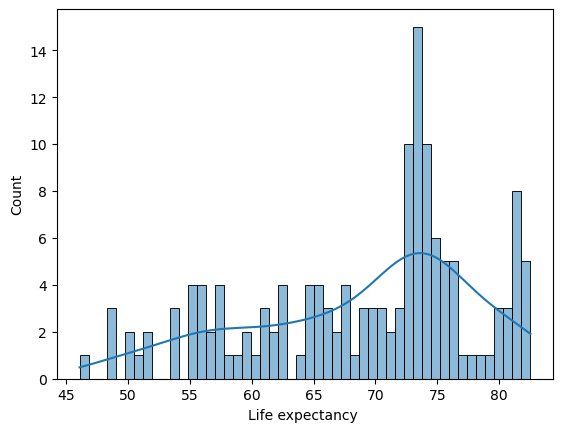

In [288]:
sns.histplot(data[target_str],bins = 50, kde = True)
plt.show()

The target variable(life expectancy) is not perfect bell-shape, it is a bit skewed right, it can be considered a normal distribution. 
The Vaccine columns, Alcohol, Total Expenditure are feauture variables I believe would be helpfull in modeling the target variable. Since immunization help protect body and can be factors expand life spand. Drinking alcohol in long time can damage liver affect health, The expenditure from government help low-income people access to healthcare.

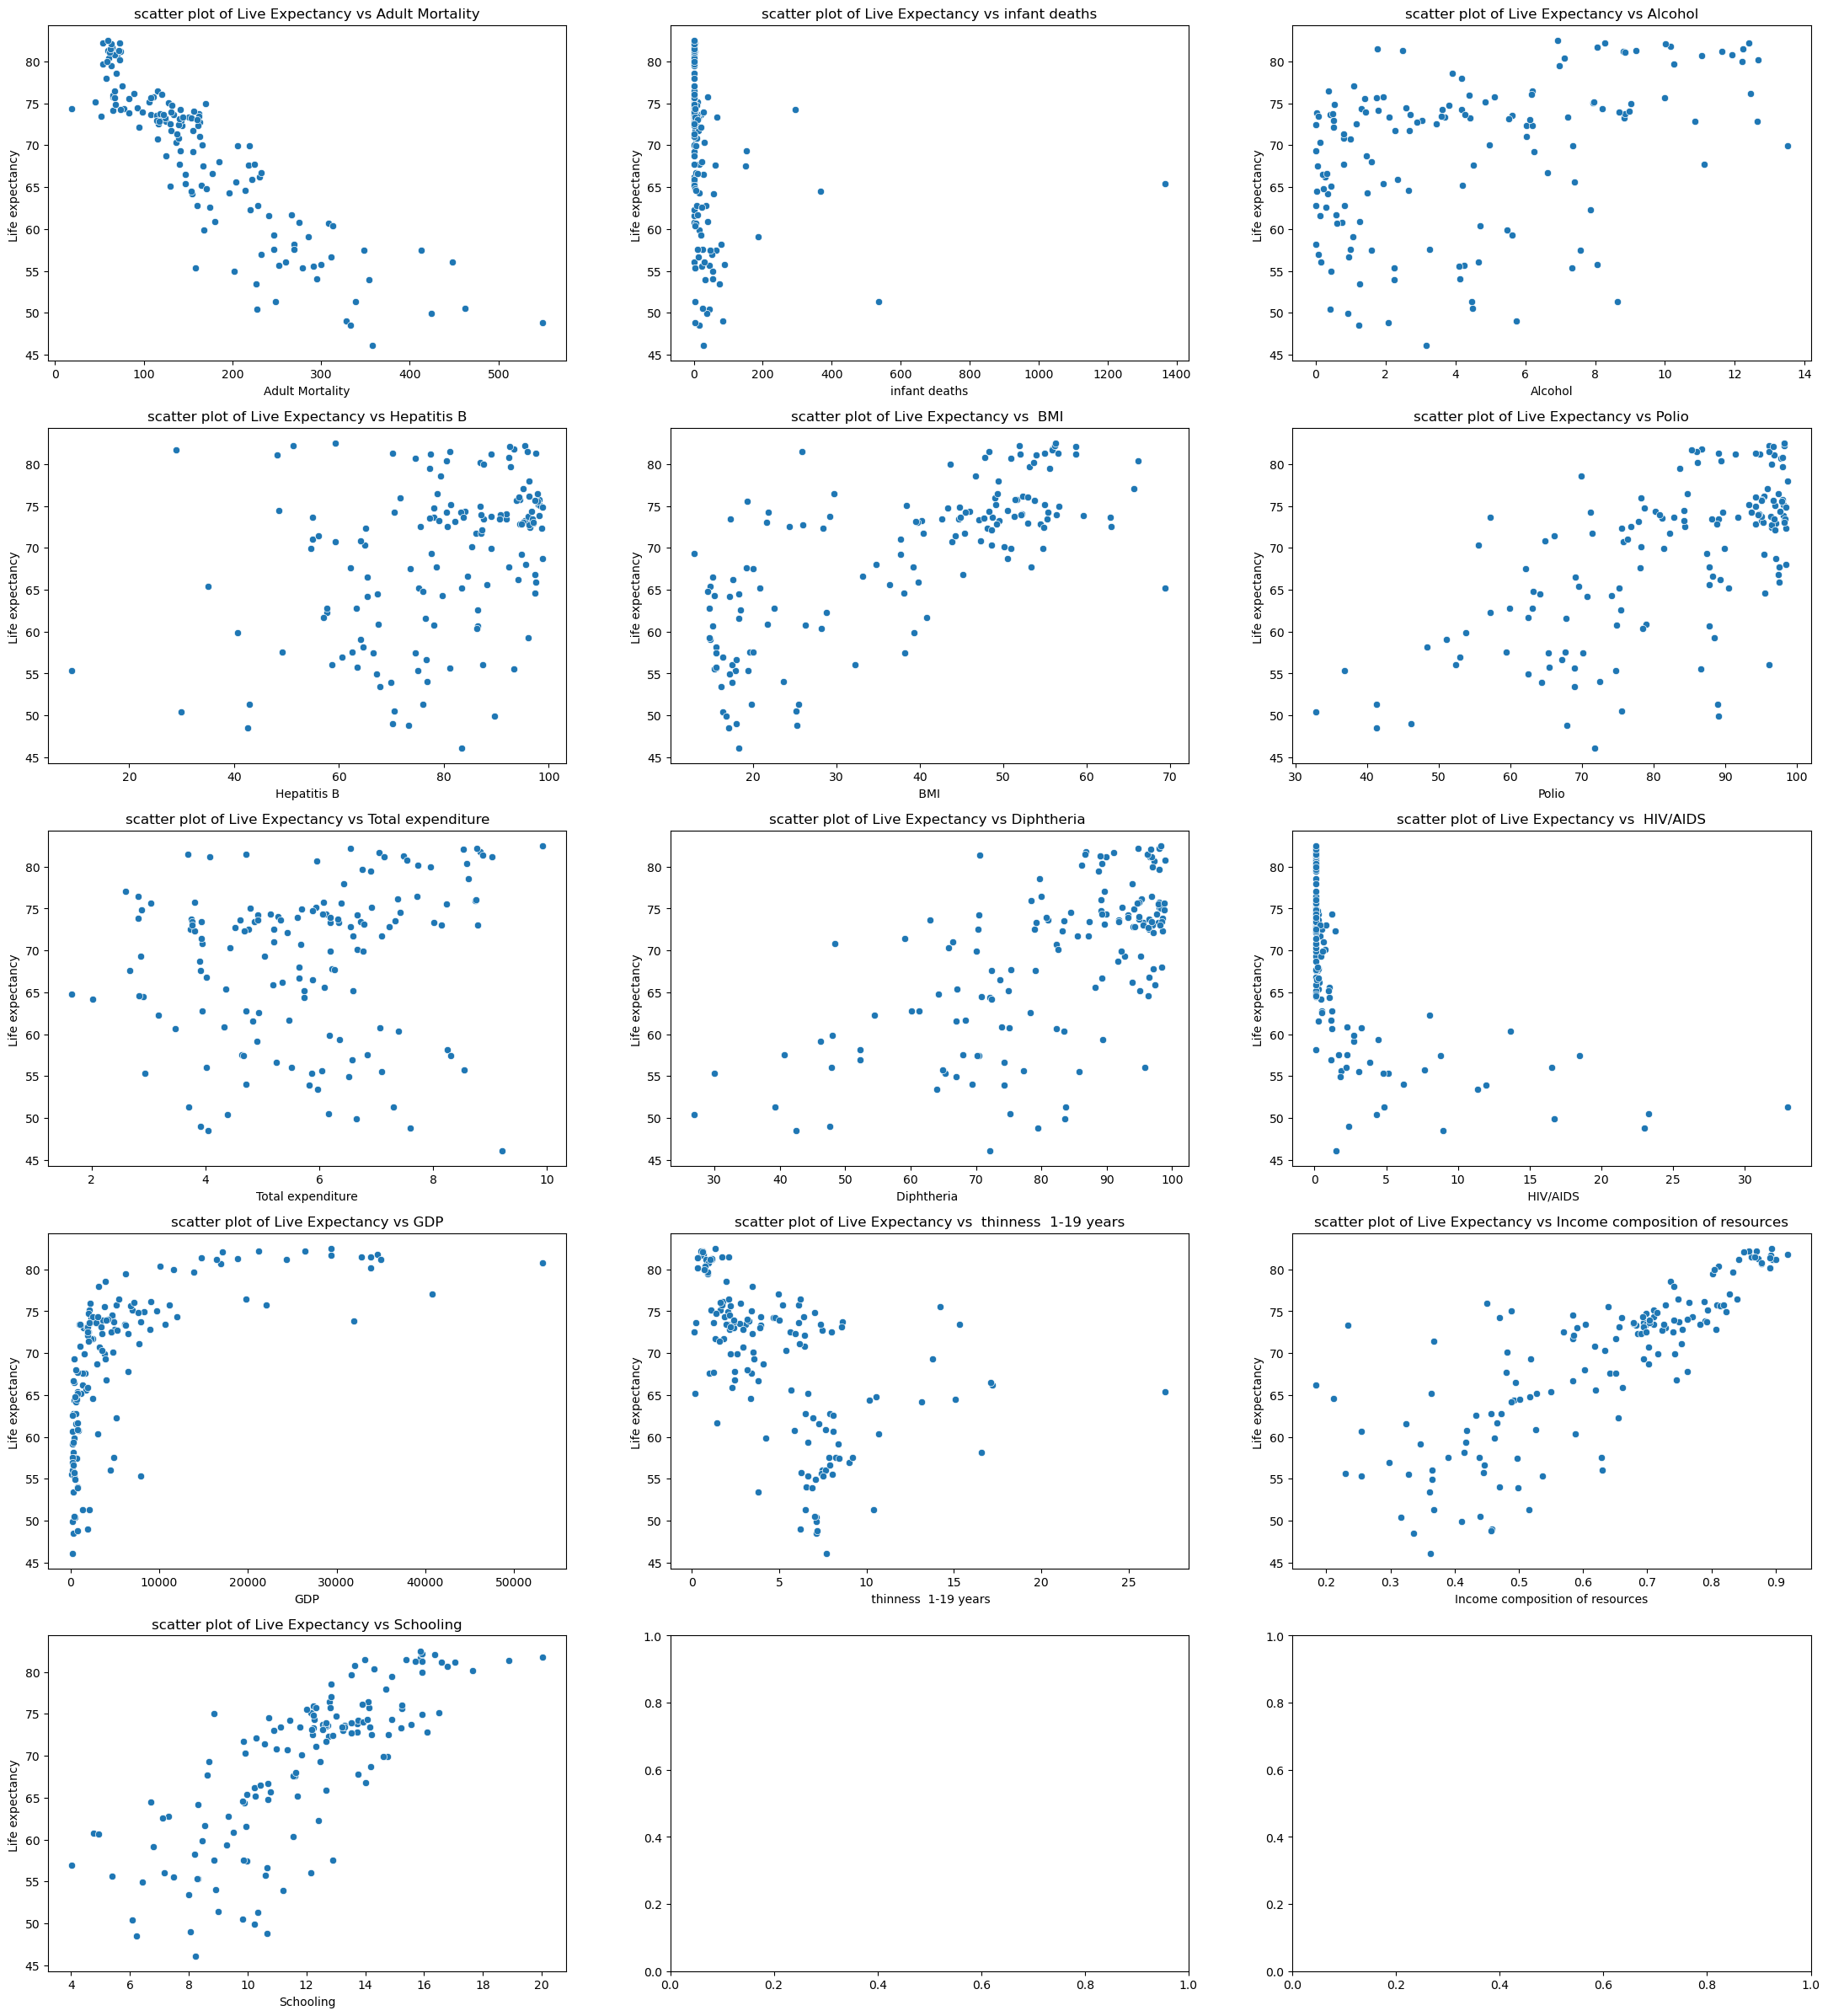

In [289]:
fig,ax= plt.subplots(figsize=(27,30), ncols=3, nrows=5)
c = 2
for i in range (0,5):
    for j in range(0,3):
        if c < 15:
            sns.scatterplot(x=data.columns[c], y= target_str,data=data, ax=ax[i][j]).set(title = 'scatter plot of Live Expectancy vs {}'.format(data.columns[c]))
            c = c + 1
plt.show()

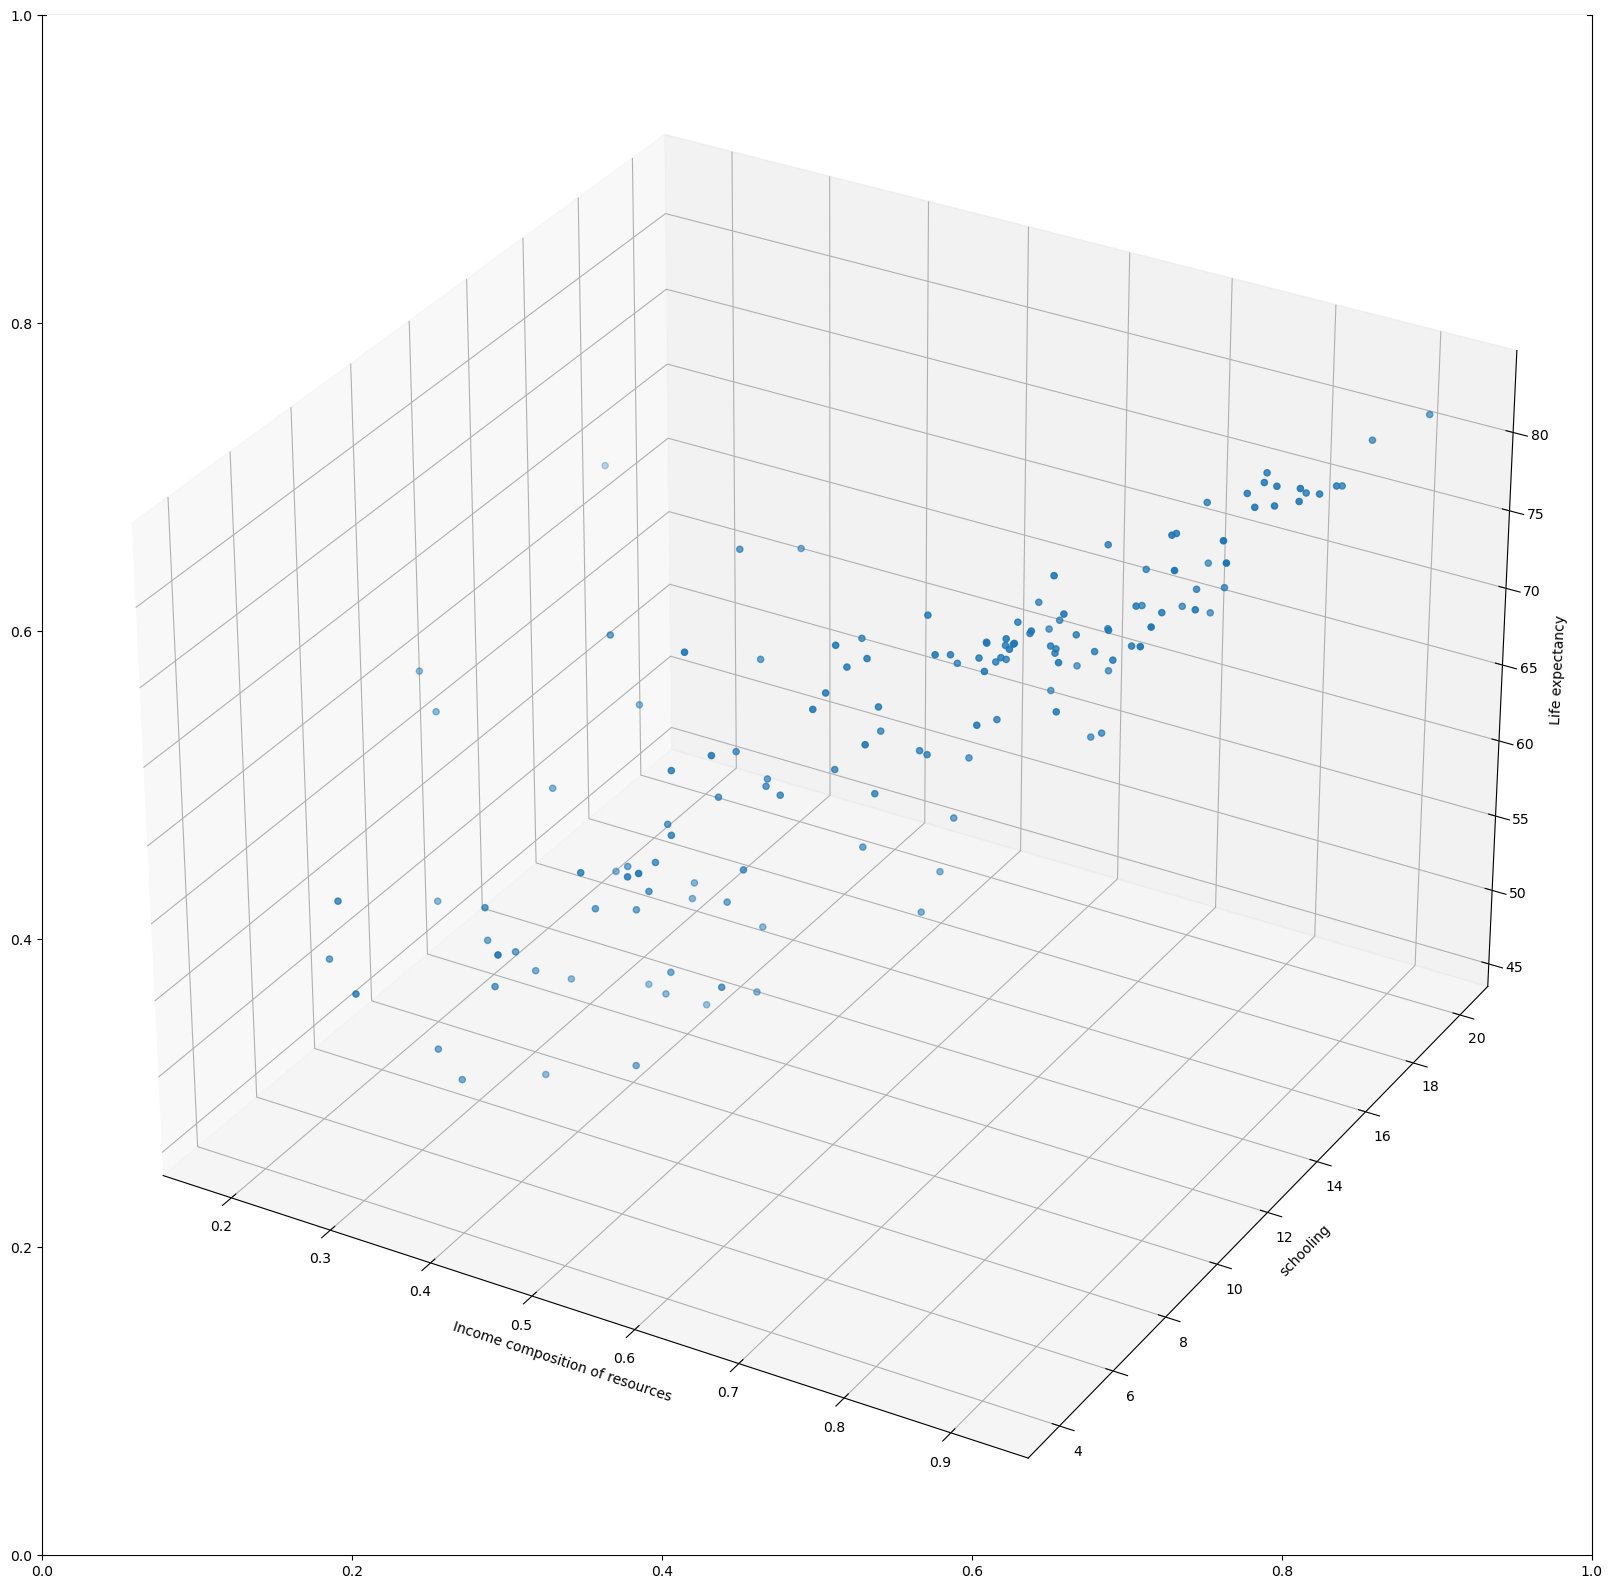

In [290]:
f = plt.subplots(figsize=(20,20))
plot = plt.axes (projection='3d')
plot.scatter3D (data['Income composition of resources'], data['Schooling'], data[target_str])
plot.set_xlabel ('Income composition of resources')
plot.set_ylabel ('schooling')
plot.set_zlabel (target_str)
plt.show()

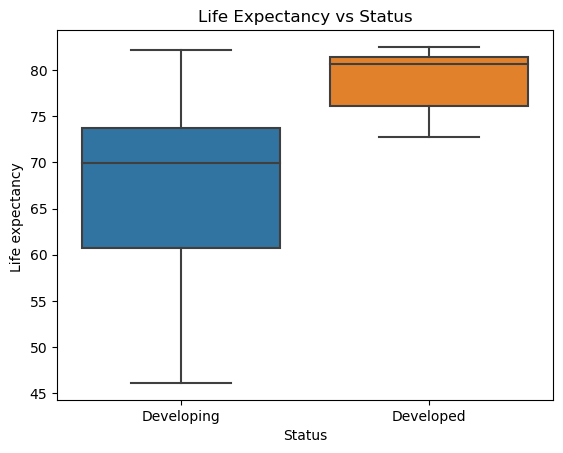

In [291]:
sns.boxplot(x='Status', y= target_str, data=data)
plt.title('Life Expectancy vs Status')
plt.show()

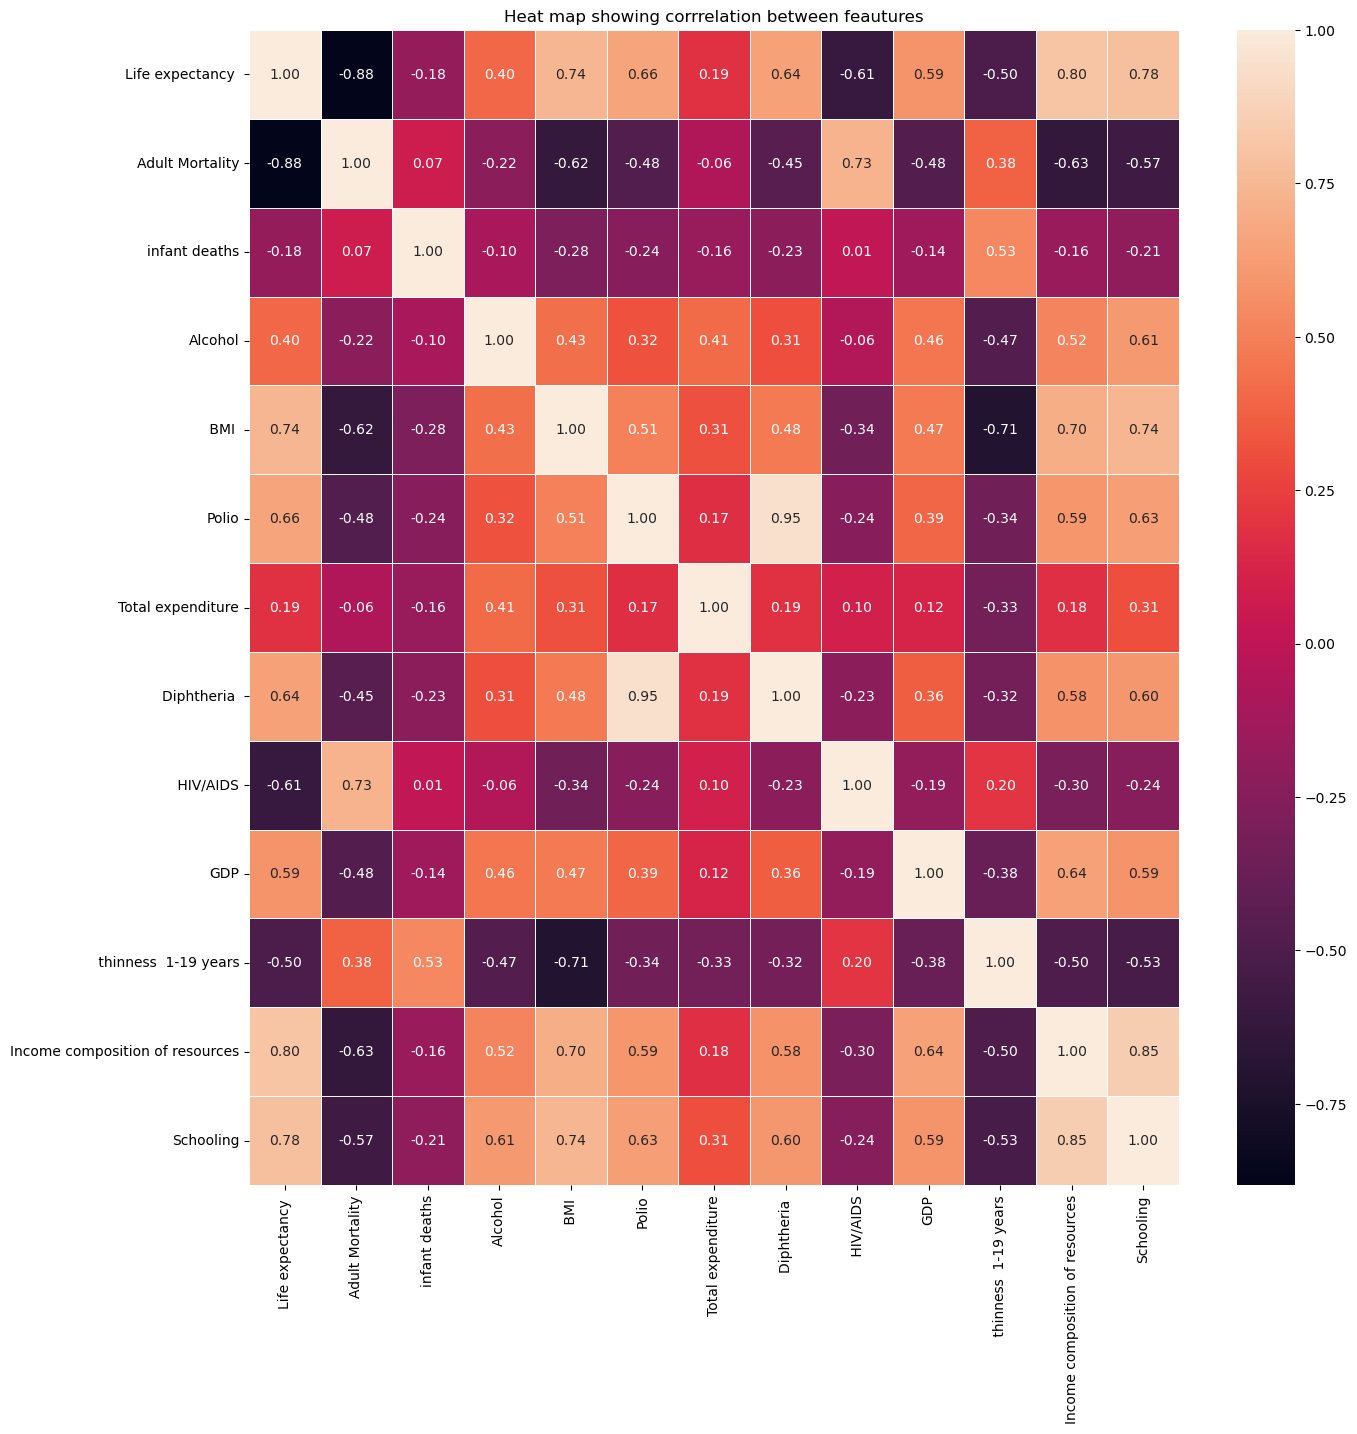

In [292]:
f, ax = plt.subplots(figsize=(15, 15))
data_col = data.drop(columns = ['Status', 'Hepatitis B'],)
sns.heatmap(data_col.corr(),annot=True, fmt=".2f", linewidths=.5, ax=ax)
plt.title('Heat map showing corrrelation between feautures')
plt.show()

# Modelling using Linear Regression

In [293]:
data.loc[data['Status'] == "Developing", "Status"] = 0

In [294]:
data.loc[data['Status'] == "Developed", "Status"] = 1

In [295]:
X = data.drop(target_str, axis = 1)
Y = data[target_str]

In [296]:
X.head()

,Status,Adult Mortality,infant deaths,Alcohol,Hepatitis B,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling
0,0,269.0625,78.2500,0.014375,64.562500,15.51875,48.3750,8.252500,52.3125,0.10000,340.015425,16.58125,0.415375,8.21250
1,0,45.0625,0.6875,4.848750,98.000000,49.06875,98.1250,5.945625,98.0625,0.10000,2119.726679,1.61875,0.709875,12.13750
2,0,108.1875,20.3125,0.406667,78.000000,48.74375,91.7500,4.604000,91.8750,0.10000,2847.853392,6.09375,0.694875,12.71250
3,0,328.5625,83.7500,5.740667,70.222222,18.01875,46.1250,3.919333,47.6875,2.36875,1975.143045,6.19375,0.458375,8.04375
4,0,127.5000,0.0000,7.949333,98.266667,38.42500,96.9375,4.791333,98.3125,0.12500,9759.305728,3.42500,0.488625,8.84375


In [297]:
X = sm.add_constant(X)

/Users/bedan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [298]:
model = sm.OLS(Y.astype(float),X.astype(float)).fit()

In [299]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     123.3
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           1.62e-68
Time:                        15:57:35   Log-Likelihood:                -338.84
No. Observations:                 147   AIC:                             707.7
Df Residuals:                     132   BIC:                             752.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

R^2 = 0.929 means 92.9% of the variation in target (life expectancy) is accounted for by the features values
The Beta coefficient is 56.08, this is y interception when other feauture variables set to 0. It mean the avearge life expectancy will be 56.08 when there is no vaccine, school, etc... are set to 0.

Coeff status: In developed country the life expectancy increased by 0.3 years

Coef Total expenditure : For every percent government expenditure spend on health care, the average life expectancy is increased by 0.15 years

Coeff Diphtheria: as perentage newborn (1 year old) have Dip mmunization cover increase by 1, the average life expectancy increases by 0.1369 year

Coeff HIV/AIDS : for every death per 1000 live birth because of HIV/AIDS the average life expectancy is decreased by 0.2251

Coeff Income composition of resources : as Income Composition of Resources (Human Development Index in terms of income composition of resources) increase the life expectancy increase by 7 years
Human Development Index : measures each country’s social and economic development by focusing on the following four factors: mean years of schooling, expected years of schooling, life expectancy at birth, and gross national income (GNI) per capita

Coeff Schooling: For each year in school, the avearge life expectancy will increase by 0.566 years

Base on the R^2 and B coefficient I think this a good model. The R^2 is high and Beta coefficient is 56 (or you can say that the average life expectancy is 56 years) when the country is a developing country and other factors are set to 0. It is reasonable to consider that this is a good model.


# Checking assumptions

/Users/bedan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


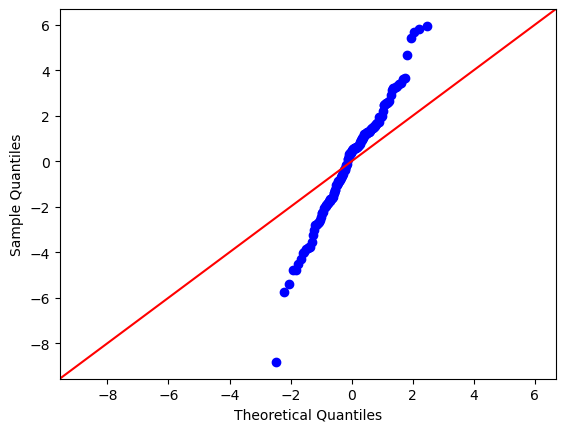

In [304]:
fig = sm.qqplot(model.resid, line='45')
plt.show()

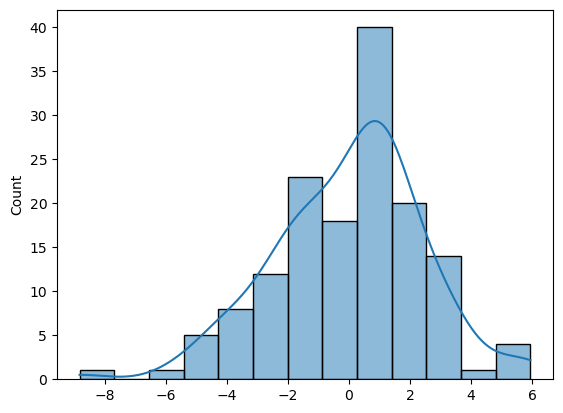

In [305]:
sns.histplot(model.resid, kde = True)
plt.show()

1)Base on both graphs above I think the residual is not normal. The p-value of JB indicate that the residual is normally distribution. When error u are not normal we can not draw a valid conclussion from the model and the estimate variance will be incorrect.
2)The Durbin-Watson value is 2.2 so the residuals are not correlated.When the errors are not independent we get biased standard error and p-value

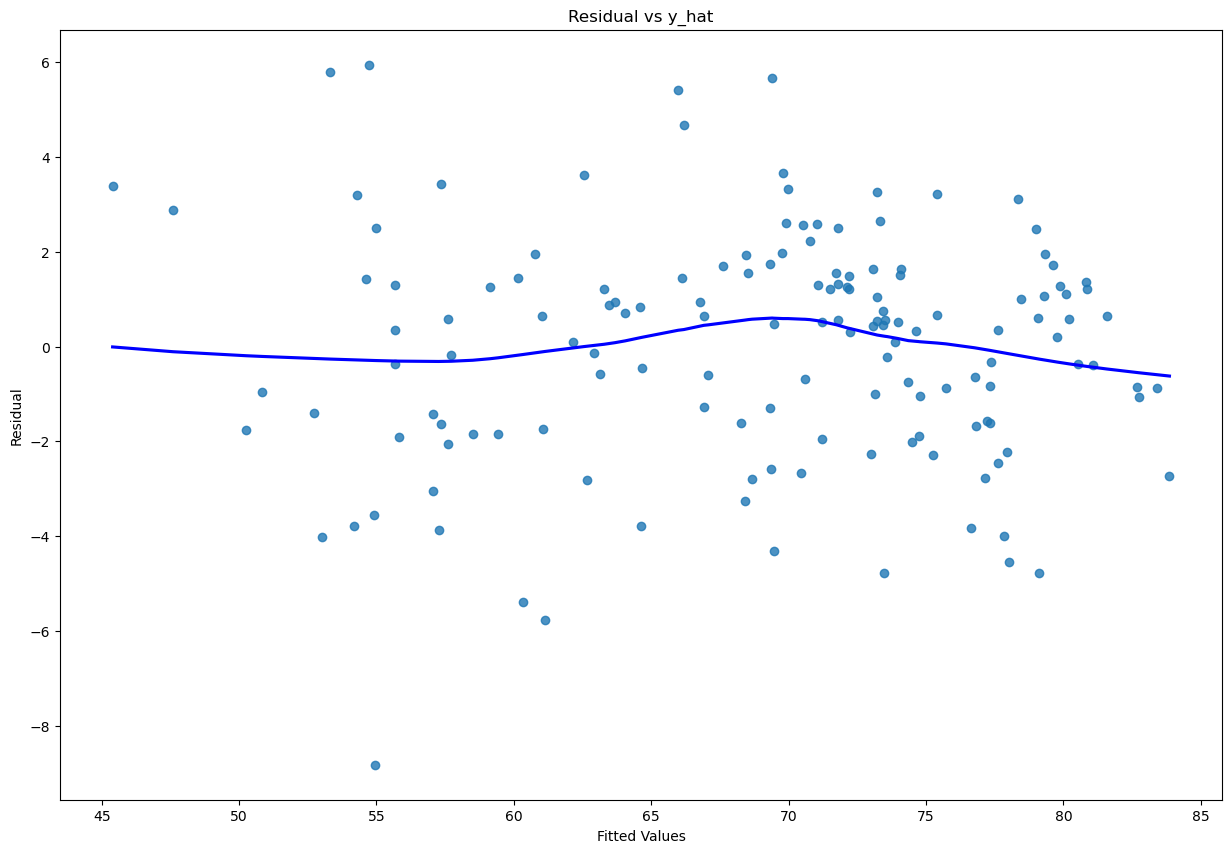

In [306]:
y_hat = model.predict()
plt.figure(figsize=(15,10))
sns.regplot(x = y_hat, y = model.resid, lowess =  True, line_kws = {'color':'blue'})
plt.title('Residual vs y_hat')
plt.xlabel('Fitted Values')
plt.ylabel('Residual')
plt.show()

3) a line go through dots, the line is not straight and curves a little bit, the dots rae spread out randomly. I think the residual have a constant variance. If we do not see constant variance we will have incorrect confidence intervals abd p-values.


In [276]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
# the independent variables set 
X = data.drop(target_str, axis = 1)
X = X.astype(float)
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 

print(vif_data)

                            feature         VIF
0                            Status    2.501571
1                   Adult Mortality    9.923991
2                     infant deaths    1.782233
3                           Alcohol    5.700175
4                       Hepatitis B   69.385802
5                              BMI    25.201957
6                             Polio  305.720358
7                 Total expenditure   15.132634
8                       Diphtheria   294.385221
9                          HIV/AIDS    2.510611
10                              GDP    3.169420
11             thinness  1-19 years    6.832174
12  Income composition of resources   56.450759
13                        Schooling   88.612382


4) The feauture has highest VIF is Polio. When multicolinear is high it reduces the precision of the estimated coefficients, which weakens the statistical power of the regression model and we might not be able to trust the p-values to test the B coefficient